# Assignment 1. Numerical data (5% Credit)

### In this assignment, you will use log data collected through AutoTutor ARC (Adult Reading Comprehension), an Intelligent Tutoring System (ITS). The study focuses on how the conversational agent's language style impacts the quality of summaries written by participants. Participants were assigned to one of three conditions: (1) formal, where both teacher and peer agents spoke formally, (2) informal, where both agents spoke informally, and (3) mixed, where the teacher agent spoke formally while the peer agent spoke informally.

### Participants first took a pretest covering summary writing, reading, demographic information, and other student information. Then, they received a 3-hour intervention guided by conversational agents. Finally, they completed a posttest on summary writing and provided feedback.

### Dataset
#### 1) "Summary data - Lesson2-3-9-10.xlsx": Lessons 2 and 3 were designated for the pretest, while Lessons 9 and 10 were for the posttest (Variable name is "LessonID").

## Note.
## 1. To receive full credits, submit the ipynb file with all the output.
## 2. Save this file as a new copy and rename it in the file name: lastName_6910_assign1.ipynb.
## 3. You are welcome to use ChatGPT or other resources for Python code; however, please verify the accuracy of the information obtained from these resources.

### Install and import the Package
#### Install the packages if you haven't, using "!pip install package"

In [1]:
# !pip install pandas

#### Feel free to edit the code. The provided code snippets serve as a reference for how to annotate and comment on your work.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

## Q1. (1% credit)
### Participants were given the opportunity for multiple attempts during the test ("Summary data - Lesson2-3-9-10.xlsx"). Extract the data from the first attempt (Variable name: "LessonAttempt" with value "1"). In cases where participants couldn't complete the first attempt due to technical issues, use the data from their second attempt ("LessonAttempt" with value "2"), and so on.

>### Create a new variable named "Test" with two distinct categories: "pretest" for lessons 2 or 3, and "posttest" for lessons 9 or 10 based on the lesson information provided from the variable "LessonID."

In [3]:
os.getcwd()
pd.set_option('display.max_columns', None)

In [4]:
"""# upload data
from google.colab import files
uploaded = files.upload()"""

'# upload data\nfrom google.colab import files\nuploaded = files.upload()'

In [5]:
# Read data from Sheet 1 of the Excel file into a DataFrame
summary_log_data = pd.read_excel('Summary data - Lesson2-3-9-10.xlsx', sheet_name='Sheet1')

In [6]:
# 1.1 Extract the log data from the first attempt.
# Hint: If there is missing data in the first attempt, replace the missing value with the second attempt.
# If that value in the second attempt is also missing, replace the missing value in the third attempt, and so on.

def fill_na_attempts(df, first_attempt_cols):
    # Calculate the total number of attempts possible based on the number of columns and the pattern repeating
    total_columns = len(df.columns)
    columns_per_attempt = len(first_attempt_cols)
    total_attempts = total_columns // columns_per_attempt

    # Iterate through the dataset, attempting to fill missing data from subsequent attempts
    for attempt in range(1, total_attempts):  # Start from the second attempt
        # Break the loop if there are no more missing values in the first attempt columns
        if df[first_attempt_cols].isnull().sum().sum() == 0:
            break
        
        # For each column in the first attempt, try to fill missing values from the current attempt
        for col in first_attempt_cols:
            # Calculate the index for the current attempt's corresponding column
            current_attempt_col_index = df.columns.get_loc(col) + (columns_per_attempt * attempt)
            if current_attempt_col_index < total_columns:  # Check if the column index is within bounds
                current_attempt_col = df.columns[current_attempt_col_index]
                # Fill missing values in the first attempt column with values from the current attempt column
                df[col] = df.apply(lambda x: x[current_attempt_col] if pd.isnull(x[col]) else x[col], axis=1)

    return df

In [7]:
first_attempt_columns = summary_log_data.iloc[:,4:25].columns

In [8]:
df_all = fill_na_attempts(summary_log_data, first_attempt_columns)

In [9]:
df = df_all.iloc[:,:25]

In [10]:
# 1.2 Create the "Test" variable.

def test_func(x):
    if x== 'lesson2' or x== 'lesson3':
        return 'pretest'
    elif x== 'lesson9' or x== 'lesson10':
        return 'posttest'
    else:
        return np.nan

In [11]:
df['Test'] = df['LessonID'].apply(test_func)

## Q2. (1% credit)

>### The variable "Q5Duration" is the time (seconds) that students spent writing the summary. You can rename it as "WritingTime." Visualize WritingTime. According to the visualization, is it skewed? Does it contain outliers? (Hint: If a value is more or less than 3 standard deviations away from the mean, it is an outlier.)

In [12]:
df = df.rename(columns={"Q5Duration" : "WritingTime"})

In [13]:
std = df["WritingTime"].std()
std_3 = std * 3

Text(0, 0.5, 'Frequency')

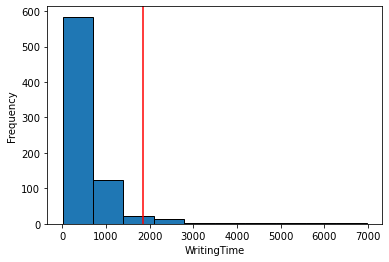

In [14]:
# 2.1 Visualization
# Plot histogram
plt.hist(df['WritingTime'], edgecolor='black')

# Adding outlier line
plt.axvline(x = std_3, color='red')

# Adding labels
plt.xlabel('WritingTime')
plt.ylabel('Frequency')

### 2.2 According to the visualization, is it skewed? (You needn't calculate the skewness.)
### Your answer: *Yes, according to the visualization its skewed*




## Q3. (1% credit)
>### Log transformation is effective for handling skewed data. Transform this variable by applying a log transformation (with a base of e or 10).
>### Visualize the transformed variables that you created. Does log transformation address the issue of skewness?


In [15]:
# 3.1 Log transformation: Name it "WritingTime_log"
df['WritingTime_log'] = df['WritingTime'].apply(np.log10)

Text(0, 0.5, 'Frequency')

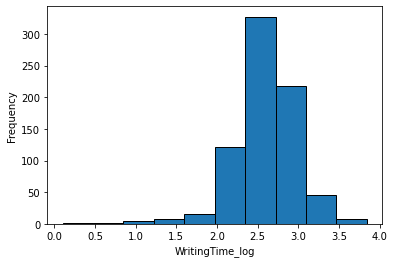

In [16]:
# 3.2 Visualize the transformed WritingTime
# Plot histogram
plt.hist(df['WritingTime_log'], edgecolor='black')

# Adding labels
plt.xlabel('WritingTime_log')
plt.ylabel('Frequency')

### 3.3 Does log transformation address the issue of skewness?
### Your answer: *Log transformation has helped with skewness*

## Q4. (1% credit)

### Instead of log transformation, normalize the writing time using min-max scaling.
### Then visualize it.
### Which method is better to handle the skewness, log-transformed writing time or normalized writing time?

In [17]:
# 4.1 Generate min-max scaling: Name it WritingTime_scale

df['WritingTime_scale']= (df['WritingTime'] - df['WritingTime'].min()) / (df['WritingTime'].max() - df['WritingTime'].min()) 


Text(0, 0.5, 'Frequency')

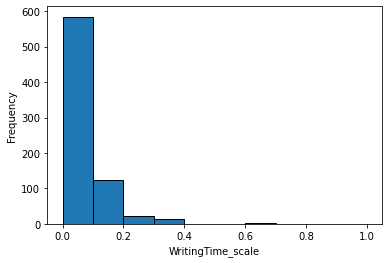

In [18]:
# 4.2 Visualize scaled WritingTime

# Plot histogram
plt.hist(df['WritingTime_scale'], edgecolor='black')

# Adding labels
plt.xlabel('WritingTime_scale')
plt.ylabel('Frequency')

### 4.3 Which method is better to handle the skewness, log-transformed or normalized?

### Your Answer: *log-transformed*



## Q5 (1% credit)
### Calculate the mean and standard deviation of WritingTime_log and WritingTime_scale that you created for WritingTime on pre-test and post-test.

### Hint: remember to remove duplicate or empty cells if it applies.

In [19]:
# Check duplicates

# Check duplicates
print("Duplicate rows total: " + str(df.duplicated().sum()))
print("Duplicate rows total based on UserId and LessonID: "+ str(df.duplicated(['UserID', 'LessonID']).sum()))

Duplicate rows total: 0
Duplicate rows total based on UserId and LessonID: 0


In [20]:
# Check missing values

df.isna().sum()

RecordID              0
ClassID               0
UserID                0
LessonID              0
LessonAttempt         0
TotalTime             0
XML                   0
Q1Data                0
Q2Data                0
Q3Data                0
Q4Data                0
Q5Data               17
Q6Data               18
Q7Data               18
Q8Data               18
Q9Data               18
Q1Duration            0
Q2Duration            0
Q3Duration            0
Q4Duration            0
WritingTime          17
Q6Duration           18
Q7Duration           18
Q8Duration           18
Q9Duration           18
Test                  0
WritingTime_log      17
WritingTime_scale    17
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isna().sum()

RecordID             0
ClassID              0
UserID               0
LessonID             0
LessonAttempt        0
TotalTime            0
XML                  0
Q1Data               0
Q2Data               0
Q3Data               0
Q4Data               0
Q5Data               0
Q6Data               0
Q7Data               0
Q8Data               0
Q9Data               0
Q1Duration           0
Q2Duration           0
Q3Duration           0
Q4Duration           0
WritingTime          0
Q6Duration           0
Q7Duration           0
Q8Duration           0
Q9Duration           0
Test                 0
WritingTime_log      0
WritingTime_scale    0
dtype: int64

In [23]:
# Mean and Standard deviation

## mean and Standard deviation pretest
print("pretest log mean: " + str(df['WritingTime_log'][df['Test'] == 'pretest'].mean()))
print("pretest scale mean: " + str(df['WritingTime_scale'][df['Test'] == 'pretest'].mean()))

print("pretest log SD: " + str(df['WritingTime_log'][df['Test'] == 'pretest'].std()))
print("pretest scale SD: " + str(df['WritingTime_scale'][df['Test'] == 'pretest'].std()))

print('----------')
## mean and Standard deviation posttest
print("posttest log mean: " + str(df['WritingTime_log'][df['Test'] == 'posttest'].mean()))
print("posttest scale mean: " + str(df['WritingTime_scale'][df['Test'] == 'posttest'].mean()))

print("posttest log SD: " + str(df['WritingTime_log'][df['Test'] == 'posttest'].std()))
print("posttest scale SD: " + str(df['WritingTime_scale'][df['Test'] == 'posttest'].std()))

pretest log mean: 2.590890800130781
pretest scale mean: 0.08005408057111377
pretest log SD: 0.391990717329245
pretest scale SD: 0.09516440506783105
----------
posttest log mean: 2.6034648540796392
posttest scale mean: 0.08196541862169215
posttest log SD: 0.3902371831213467
posttest scale SD: 0.08189920151113299


Recommended but not required: create the z-score and l2 normalization as well as the square root and Box-Cox transformation for WritingTime. Visualize these two normalized and two transformed WritingTime. Among all the six normalized and transformed WritingTime, which one would like to use to predict the quality of writing? And why?

In [24]:
# z-score normalization


In [25]:
# l2 normalization


In [26]:
# square root transformation


In [27]:
# Box-Cox transformation


In [28]:
# Visualization


### Among all the six normalized and transformed WritingTime, which one would like to use to predict the quality of writing? And why?

### Your Answer:




## Save the dataset for future assignments.

In [29]:
# Save the dataset as "Assign1_summary_log.csv" for the future use.

# df.to_csv("Assign1_summary_log.csv")